### Step 0 - Install Kaggle API

In [5]:
!pip install -q kaggle


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_file ('najir0123/walmart-10k-sales-datasets',
                            file_name= 'Walmart.csv')

Dataset URL: https://www.kaggle.com/datasets/najir0123/walmart-10k-sales-datasets


False

### Step 1  - Data Exploration & Leading

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd

#mysql toolkit
!pip install mysqlclient #Biblioteca do mysql
!pip install pymysql #this will work as adapter
#from sqlalchemy import create_engine



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: '#Biblioteca'

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#this'

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df = pd.read_csv('Walmart.csv')

In [8]:
df.shape

(10051, 11)

In [9]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [10]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [12]:
#Analisando as linhas duplicadas
df.duplicated().sum()

np.int64(51)

In [13]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [14]:
#Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

#Removendo linhas vazias
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [16]:
#Tratando a coluna 'Unit_price'
#Susbstituindo o "$" por espaço
df['unit_price'] = df['unit_price'].str.replace('$','').astype(float)

In [17]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [18]:
df['total']= df['unit_price']*df['quantity']
df.shape

(9969, 12)

In [19]:
df["Ano"] = pd.to_datetime(df["date"]).dt.year
df

Fat_ano = df.groupby (['Ano']).agg(
    total_fat = ('total','sum')
)

Fat_ano

C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_21472\11747544.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Ano"] = pd.to_datetime(df["date"]).dt.year


,total_fat
Ano,
2019,307587.38
2020,219423.00
2021,233051.00
2022,217405.00
2023,232260.00


In [20]:
df.to_csv("Walmart_Cleanned_Data.csv",index=False)

In [21]:
df.describe()

,invoice_id,unit_price,quantity,rating,profit_margin,total,Ano
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744,121.348819,2021.247868
std,2886.217349,21.203766,1.605455,1.763723,0.090659,112.678040,1.295694
min,1.000000,10.080000,1.000000,3.000000,0.180000,10.170000,2019.000000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000,54.000000,2020.000000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000,88.000000,2021.000000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000,156.000000,2022.000000
max,10000.000000,99.960000,10.000000,10.000000,0.570000,993.000000,2023.000000


In [22]:
df.groupby('')

KeyError: ''

### Step 2 - Load Data in MySQL

### Step 3 - Bussiness Problems

In [3]:
# Leitura dos dataset

df_clean = pd.read_csv('Walmart_Cleanned_Data.csv')
df_clean.head()
df_clean.shape
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
 11  total           9969 non-null   float64
 12  Ano             9969 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 1012.6+ KB


In [39]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format='mixed', dayfirst=True)

#### Question 1

In [40]:
# Q1. Find different payment methods, number of transactions, and quantity sold by payment method

q1 = df_clean.groupby('payment_method').agg(
    transactions = ('invoice_id', 'count'),
    quantity_sold = ('quantity', 'sum')
).reset_index()
q1

,payment_method,transactions,quantity_sold
0,Cash,1832,4984.0
1,Credit card,4256,9567.0
2,Ewallet,3881,8932.0


#### Question 2

In [58]:
# Q2. Identify the highest-rated category in each branch. Display the branch, category, and average rating

#Q2_a) average rating from category in each branch
q2a = df_clean.groupby(['Branch','category']).agg(
     average_rating = ('rating', 'mean')
).reset_index()
q2a

,Branch,category,average_rating
0,WALM001,Electronic accessories,7.450000
1,WALM001,Fashion accessories,6.357576
2,WALM001,Home and lifestyle,6.163889
3,WALM001,Sports and travel,6.533333
4,WALM002,Electronic accessories,8.125000
...,...,...,...
517,WALM100,Electronic accessories,6.166667
518,WALM100,Fashion accessories,6.068000
519,WALM100,Health and beauty,6.900000
520,WALM100,Home and lifestyle,6.250000


In [59]:
#Q2_b) highest-rated category in each
q2b = q2a.loc[q2a.groupby('Branch')['average_rating'].idxmax()]
q2b

,Branch,category,average_rating
0,WALM001,Electronic accessories,7.450000
6,WALM002,Food and beverages,8.250000
14,WALM003,Sports and travel,7.500000
17,WALM004,Food and beverages,9.300000
23,WALM005,Health and beauty,8.366667
...,...,...,...
501,WALM096,Sports and travel,9.600000
504,WALM097,Food and beverages,7.675000
510,WALM098,Health and beauty,9.800000
513,WALM099,Electronic accessories,5.950000


#### Question 3

In [63]:
#Q3.
  #a) Identify the busiest day for each branch based on the number of transactions
  #b) Identify the busiest month for each branch based on the number of transactions


df_clean['day'] = df_clean['date'].dt.day_name()

q3a = df_clean.groupby(['Branch','day']).agg(
    transactions = ('invoice_id','count')
).reset_index()

q3a = q3a.loc[q3a.groupby('Branch')['transactions'].idxmax()]
q3a

,Branch,day,transactions
2,WALM001,Saturday,14
10,WALM002,Sunday,15
17,WALM003,Sunday,29
24,WALM004,Sunday,14
29,WALM005,Monday,16
...,...,...,...
670,WALM096,Tuesday,15
672,WALM097,Friday,14
680,WALM098,Monday,14
689,WALM099,Sunday,33


#### Question 4

In [64]:
#Q4 Calculate the total quantity of items sold per payment method

q4 = df_clean.groupby('payment_method').agg(
    quantity = ('quantity','sum')
).reset_index().sort_values(by='quantity', ascending=False)
q4

,payment_method,quantity
1,Credit card,9567.0
2,Ewallet,8932.0
0,Cash,4984.0


#### Question 5

In [65]:
#Q5 Determine the average, minimum and maximum rating of products for each city
q5 = df_clean.groupby('City').agg(
    avg_rating = ('rating', 'mean'),
    max_rating = ('rating', 'max'),
    min_rating = ('rating', 'min')
).reset_index().sort_values(by='avg_rating', ascending=False)
q5

,City,avg_rating,max_rating,min_rating
7,Austin,7.001667,9.3,4.0
44,Huntsville,6.812162,9.7,4.0
73,Pflugerville,6.732911,9.9,3.0
26,Denton,6.678082,9.2,3.0
19,College Station,6.671429,10.0,4.0
...,...,...,...,...
96,Weatherford,5.084242,9.0,3.0
84,San Marcos,5.076064,8.9,3.0
87,Sherman,5.064571,9.2,3.0
91,Texas City,5.042045,8.6,3.0


#### Question 6

In [66]:
#Q6 Determine the average profit margin (%) with respect to each city
q6 = df_clean.groupby('City').agg(
    avg_profit_margin = ('profit_margin', lambda x: round(x.mean()*100,2))
).reset_index().sort_values(by='avg_profit_margin', ascending=False)
q6

# EXTRA
#Determine the revenue with respect to each city
#Determine the profit with respect to each city

,City,avg_profit_margin
59,Mansfield,57.00
68,New Braunfels,51.57
32,Flower Mound,48.00
4,Amarillo,48.00
7,Austin,48.00
...,...,...
27,Eagle Pass,21.80
2,Alice,18.00
15,Canyon,18.00
64,Mineral Wells,18.00


#### Question 7

In [67]:
#Q7 Determine the most common payment method for each branch

q7 = df_clean.groupby(['Branch','payment_method']).agg(
    preferred_payment_method = ('invoice_id', 'count')
).reset_index().sort_values(by=['Branch','preferred_payment_method'],ascending=True)

q7=q7.loc[q7.groupby(['Branch'])['preferred_payment_method'].idxmax()]
q7

,Branch,payment_method,preferred_payment_method
1,WALM001,Ewallet,45
4,WALM002,Ewallet,37
6,WALM003,Credit card,115
10,WALM004,Ewallet,44
13,WALM005,Ewallet,56
...,...,...,...
279,WALM096,Ewallet,50
282,WALM097,Ewallet,38
285,WALM098,Ewallet,44
287,WALM099,Credit card,83


In [ ]:
#Dataframe - Agrupamento do total de vendas por mes e ano

df_clean['month'] = df_clean['date'].dt.month_name()

q7b = df_clean.groupby(['month', 'Ano']).agg(
    total =  ('total', 'sum')).reset_index()
q7b



,month,Ano,total
0,April,2020,7218.00
1,April,2021,6378.00
2,April,2022,5593.00
3,April,2023,6079.00
4,August,2020,16817.00
5,August,2021,16683.00
6,August,2022,16788.00
7,August,2023,18606.00
8,December,2020,60783.00
9,December,2021,66930.00


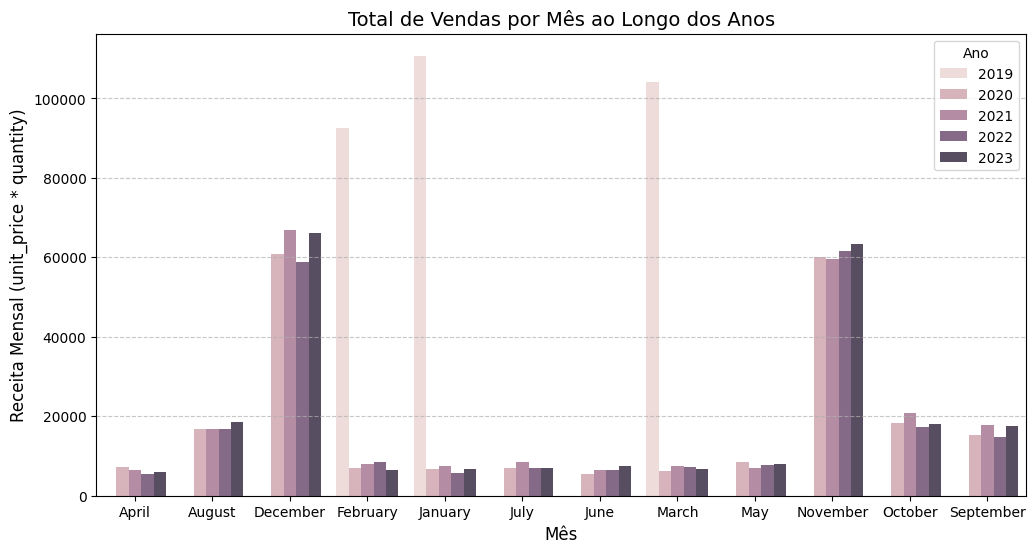

In [49]:
#  Teste
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Criando um DataFrame com todos os meses para todos os anos presentes no dataset
# all_months = pd.MultiIndex.from_product([df["month"].unique(), df["year"].unique()], names=["month", "year"])
#year_monthly_sales = df.groupby(["month", "year"]).agg(total = ('total', 'sum')).reset_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="total", hue="Ano", data=q7b, alpha=0.8, dodge=True)

# Configurações do gráfico
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Receita Mensal (unit_price * quantity)", fontsize=12)
plt.title("Total de Vendas por Mês ao Longo dos Anos", fontsize=14)
#plt.xticks(ticks=range(0, 12), labels=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Ano")

# Exibir gráfico
plt.show()

#### Question 8

In [69]:
#Q8
#a) Categorize sales into 3 group Morning, Afternoon, Evening
#b) Find out which of the shift and number of invoices

df_clean["time"] = pd.to_datetime(df_clean["time"], format="%H:%M:%S").dt.time

#Fuction of categorize sales into M/A/E

def categorize_time(time):
    if time >= pd.to_datetime("06:00:00", format="%H:%M:%S").time() and time < pd.to_datetime("12:00:00", format="%H:%M:%S").time():
        return "Morning"
    elif time >= pd.to_datetime("12:00:00", format="%H:%M:%S").time() and time < pd.to_datetime("17:00:00", format="%H:%M:%S").time():
        return "Afternoon"
    else:
        return "Evening"

# Create a new column in dataset using the fuction categorize_time
df_clean["period_of_day"] = df_clean["time"].apply(categorize_time)


In [70]:
#Q8_b - Total sales per group (Morning, Afternoon, Evening)
q8_E = df_clean.groupby(['Branch','period_of_day']).agg(
    total_sales = ('invoice_id', 'count')
).reset_index().sort_values(by=['Branch','total_sales'], ascending=[True,False])
q8_E

,Branch,period_of_day,total_sales
1,WALM001,Evening,39
0,WALM001,Afternoon,27
2,WALM001,Morning,8
4,WALM002,Evening,27
3,WALM002,Afternoon,23
...,...,...,...
295,WALM099,Evening,42
296,WALM099,Morning,40
298,WALM100,Evening,27
299,WALM100,Morning,19


#### Question 9

In [4]:
df_clean["Ano"] = pd.to_datetime(df_clean["date"]).dt.year
df_clean

q9a = df_clean.groupby(['Branch','Ano']).agg(
    revenue = ('total','sum')
).reset_index()
q9a

#2022
q9a_2022 = q9a[q9a['Ano']==2022]
q9a_2022

#2023
q9a_2023 = q9a[q9a['Ano']==2023]
q9a_2023

q9a_merge = pd.merge(q9a_2022,q9a_2023,on='Branch',suffixes=['_2022','_2023'])

q9a_merge['rev_ratio'] = round(abs((q9a_merge['revenue_2023']-q9a_merge['revenue_2022'])/(q9a_merge['revenue_2022'])*100),2)

#Filtro do top 5 decaimento de receita
q9a_filter = q9a_merge[q9a_merge['revenue_2022'] > q9a_merge['revenue_2023']]
q9a_filter.sort_values('rev_ratio', ascending= False).head(5).reset_index(drop=True)



C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_27592\3312688651.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["Ano"] = pd.to_datetime(df_clean["date"]).dt.year


,Branch,Ano_2022,revenue_2022,Ano_2023,revenue_2023,rev_ratio
0,WALM045,2022,1731.0,2023,647.0,62.62
1,WALM047,2022,2581.0,2023,1069.0,58.58
2,WALM098,2022,2446.0,2023,1030.0,57.89
3,WALM033,2022,2099.0,2023,931.0,55.65
4,WALM081,2022,1723.0,2023,850.0,50.67


### Step 4 - DataSet Insights

#### Salve Dataset

In [78]:
### Carregando o dataframe salvo no Step 1
df_insig = pd.read_csv('Walmart_Cleanned_Data.csv')
df_insig.head()
df_insig.shape

(9969, 13)

In [80]:
### Criando a coluna de turno da venda

df_insig["time"] = pd.to_datetime(df_insig["time"], format="%H:%M:%S").dt.time

#Fuction of categorize sales into M/A/E

def categorize_time(time):
    if time >= pd.to_datetime("06:00:00", format="%H:%M:%S").time() and time < pd.to_datetime("12:00:00", format="%H:%M:%S").time():
        return "Morning"
    elif time >= pd.to_datetime("12:00:00", format="%H:%M:%S").time() and time < pd.to_datetime("17:00:00", format="%H:%M:%S").time():
        return "Afternoon"
    else:
        return "Evening"

# Create a new column in dataset using the fuction categorize_time
df_insig["period_of_day"] = df_insig["time"].apply(categorize_time)

In [81]:
df_insig.to_csv("Walmart_Insights_Data.csv",index=False)